In [11]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from pandas.plotting import scatter_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd

from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV

from sklearn import svm #the professor used

from sklearn.metrics import confusion_matrix

In [12]:
data_path = "drinking_water_potability-1100.csv"
data = pd.read_csv(data_path)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
1,7.657991,236.960889,14245.78912,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1
2,8.322987,207.252462,28049.64628,8.827061,297.813085,358.725869,18.709273,60.911420,4.052136,1
3,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
4,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
...,...,...,...,...,...,...,...,...,...,...
1117,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
1118,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
1119,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
1120,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


# a) Display the Histogram of all attributes including Y

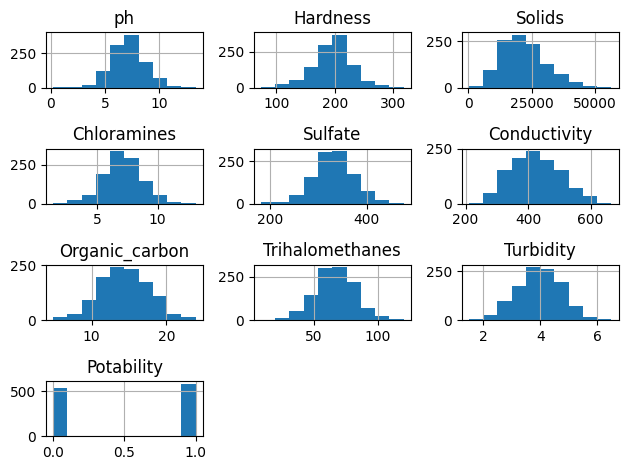

In [13]:
# print attributes histograms
data.hist()
plt.tight_layout()
plt.show()

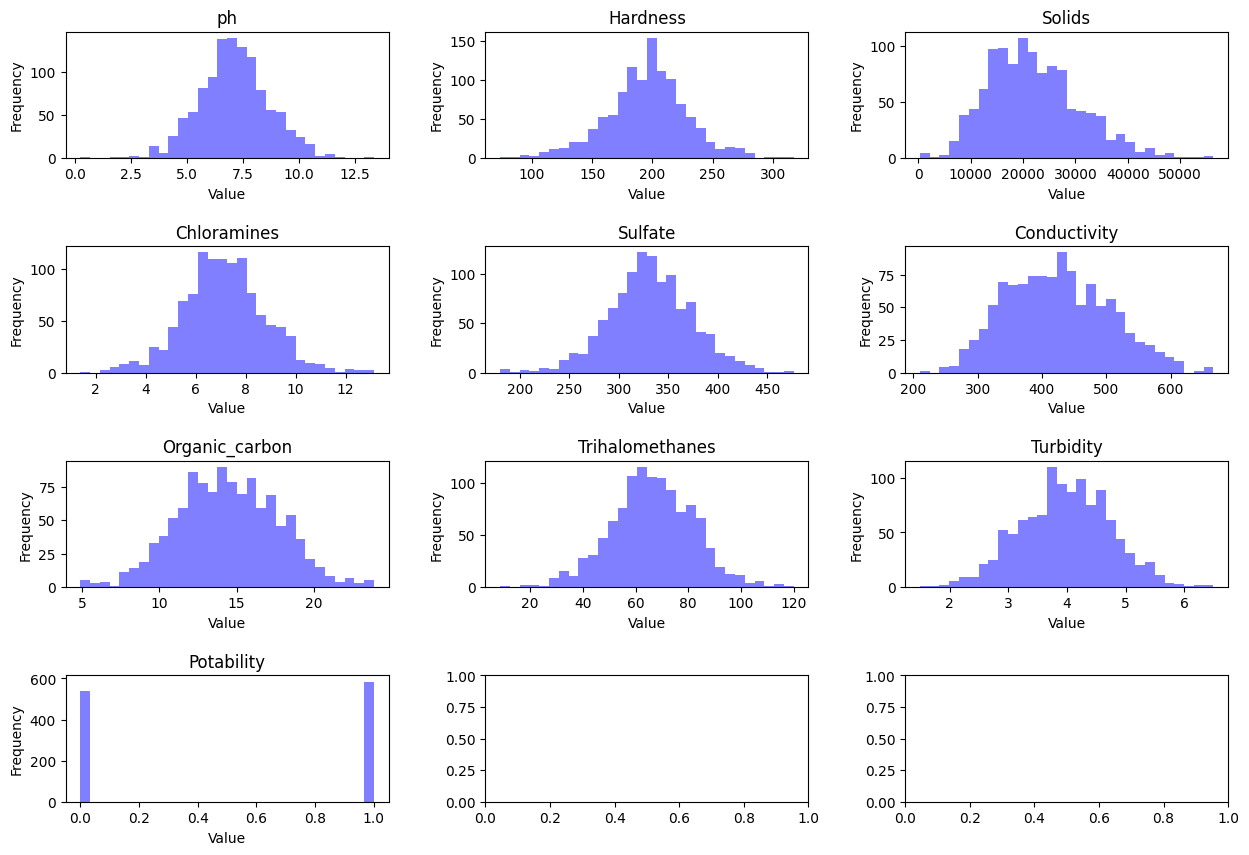

In [14]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.7, wspace=0.3)

# Flatten the array of subplots for easier indexing
axs = axs.flatten()

# Loop through each attribute and plot a histogram
for i, column in enumerate(data.columns):
    axs[i].hist(data[column], bins=30, alpha=0.5, color='blue')
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Show the plot
plt.show()




# b) Display histogram of each attribute regarding Y=0 and Y=1
What is your conclusion regarding the expected performance of the classifier? Also explain why you came to this conclusion.


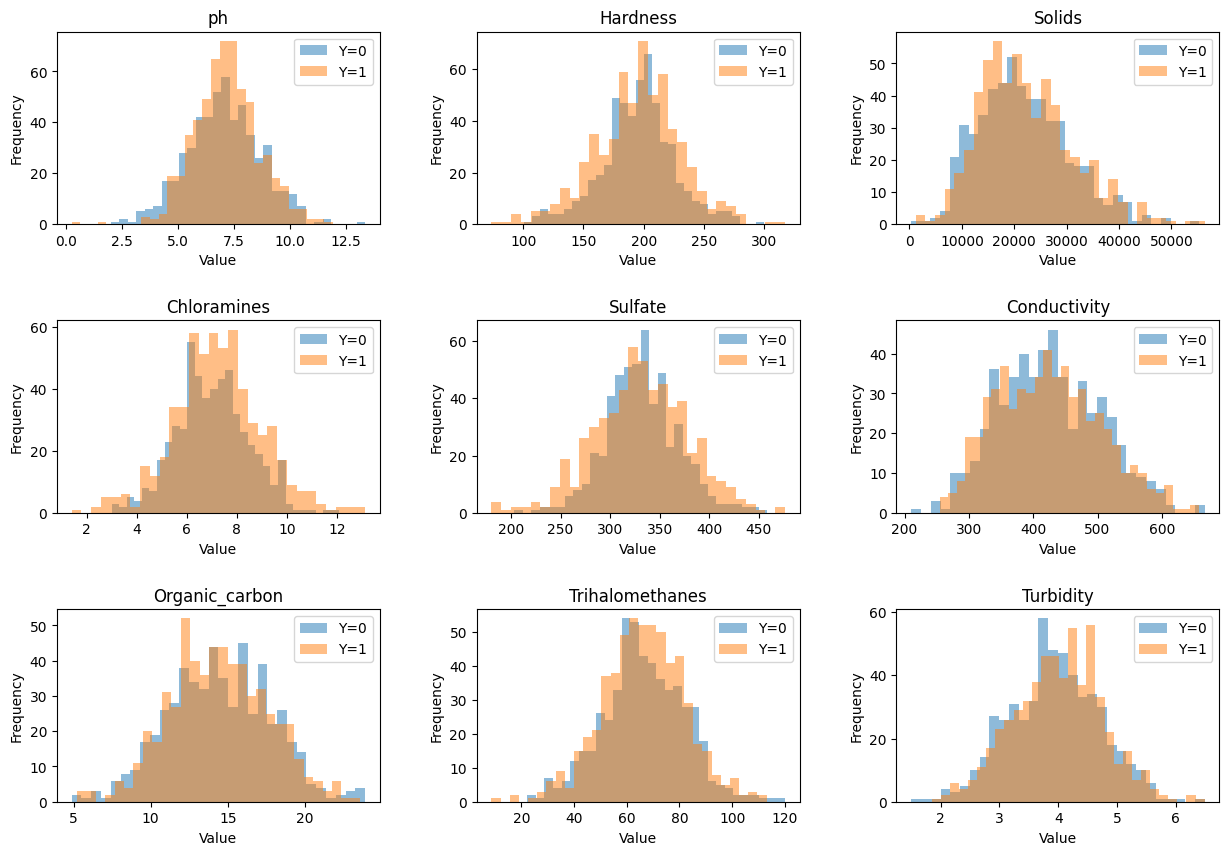

In [15]:
# Split the data based on the value of Y (Potability)
data_Y0 = data[data['Potability'] == 0]
data_Y1 = data[data['Potability'] == 1]

# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten the array of subplots for easier indexing
axs = axs.flatten()

# Loop through each attribute and plot a histogram for Y=0 and Y=1
for i, column in enumerate(data.columns[:-1]):
    axs[i].hist(data_Y0[column], bins=30, alpha=0.5, label='Y=0')
    axs[i].hist(data_Y1[column], bins=30, alpha=0.5, label='Y=1')
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

# Show the plot
plt.show()


Regarding the expected performance of the classifier, we can make some observations from the histograms. 

There is no features that have distinct differences in distributions between two classes.
Generally, the distributions are very similar, and it will be difficult for the classifier to predict correctly. All attributes have big areas of overlap between the two classes.


Therefore, by examining the histograms, we can gain insight into the difficulty of the classification task and cannot tell the importance of particular attribute in predicting the target variable.

# c) Perform several runs employing the SVM with different C and gamma parameter using cross validation. (no shuffle). Vary n_splits parameter between 10 and 50.
Display the confusion matrix of the test data for each run.
Calculate the obtained average Accuracy of the test data after 5 runs.

Remarks
Use the source file: drinking_water_potability-1100.csv
Use a train/test split of 80/20
Chose for the SVM Hyperparameter, e.g.:
grid_param = {'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],'kernel': ['linear','rbf' ]} Use the proper classes of the scikit learn libs

In [16]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import random
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

'''Gamma parameter in the svm.SVC() constructor. The value of gamma determines the shape of the decision boundary and can have a significant impact on the performance of the classifier. It's important to choose an appropriate value for gamma through experimentation or cross-validation to avoid overfitting or underfitting the data.

C parameter. A smaller C value leads to a wider margin but may allow more misclassifications, while a larger C value leads to a narrower margin but fewer misclassifications.'''

Run 1: C=1, gamma=10, kernel = rbf
n_splits=10, Accuracy=0.3413547237076649
[[ 11 526]
 [213 372]]
Confusion matrix:
[[ 11 526]
 [213 372]]


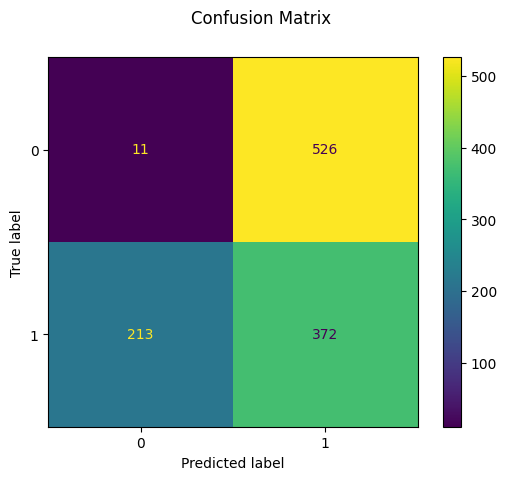

n_splits=20, Accuracy=0.2736185383244207
[[  1 536]
 [279 306]]
Confusion matrix:
[[  1 536]
 [279 306]]


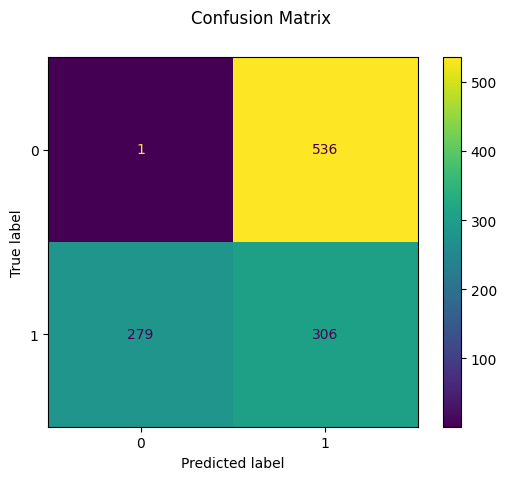

n_splits=30, Accuracy=0.5213903743315508
[[  0 537]
 [  0 585]]
Confusion matrix:
[[  0 537]
 [  0 585]]


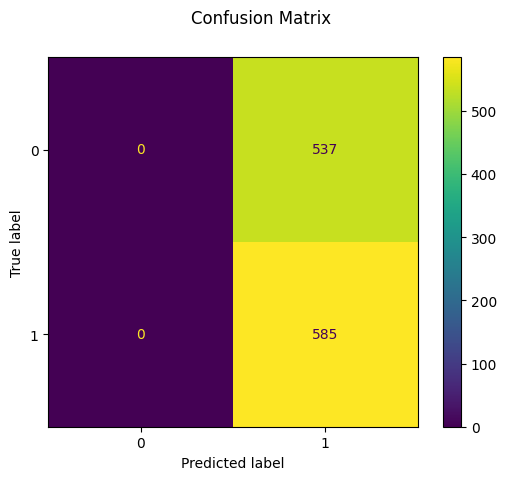

n_splits=40, Accuracy=0.5213903743315508
[[  0 537]
 [  0 585]]
Confusion matrix:
[[  0 537]
 [  0 585]]


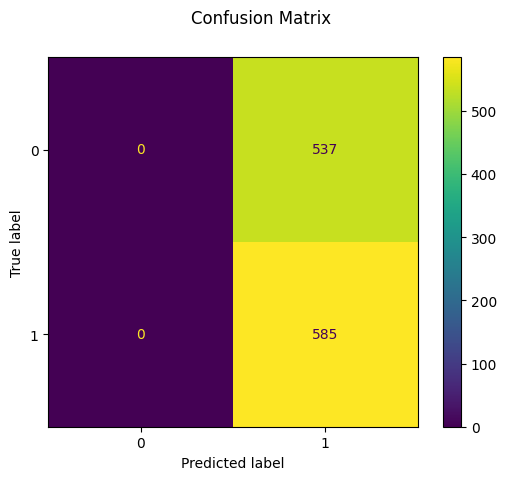

n_splits=50, Accuracy=0.5213903743315508
[[  0 537]
 [  0 585]]
Confusion matrix:
[[  0 537]
 [  0 585]]


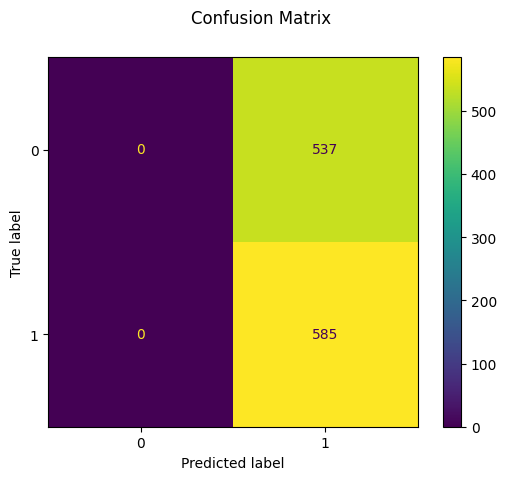

Average accuracy score for run 1: 0.4358288770053476

Run 2: C=0.1, gamma=10, kernel = rbf
n_splits=10, Accuracy=0.3413547237076649
[[ 11 526]
 [213 372]]
Confusion matrix:
[[ 11 526]
 [213 372]]


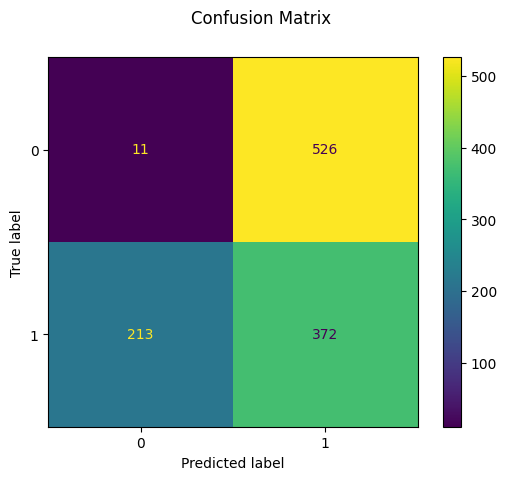

n_splits=20, Accuracy=0.2736185383244207
[[  1 536]
 [279 306]]
Confusion matrix:
[[  1 536]
 [279 306]]


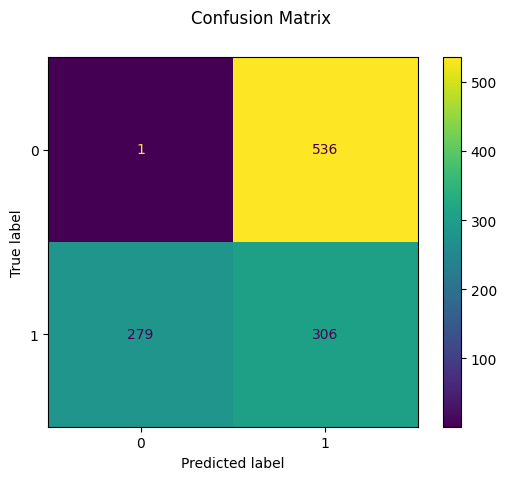

n_splits=30, Accuracy=0.5213903743315508
[[  0 537]
 [  0 585]]
Confusion matrix:
[[  0 537]
 [  0 585]]


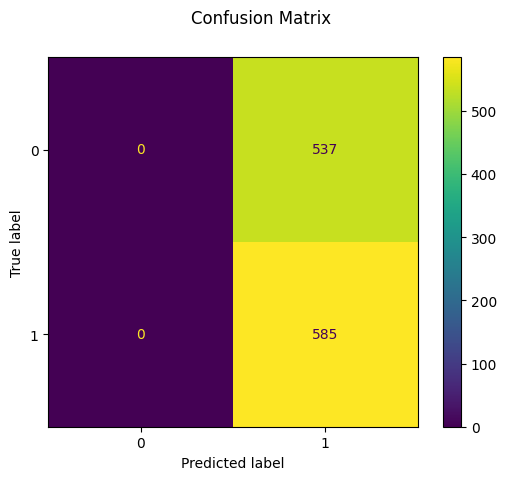

n_splits=40, Accuracy=0.5213903743315508
[[  0 537]
 [  0 585]]
Confusion matrix:
[[  0 537]
 [  0 585]]


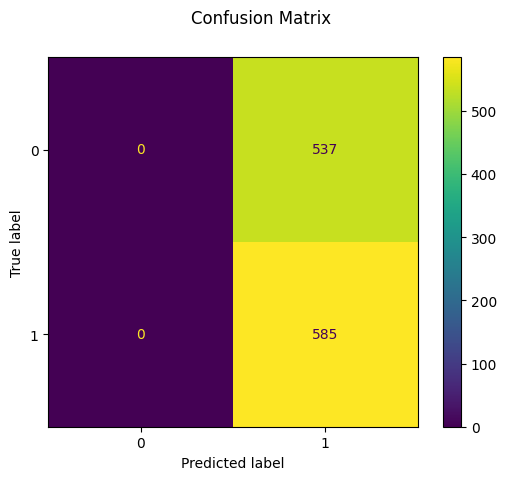

n_splits=50, Accuracy=0.5213903743315508
[[  0 537]
 [  0 585]]
Confusion matrix:
[[  0 537]
 [  0 585]]


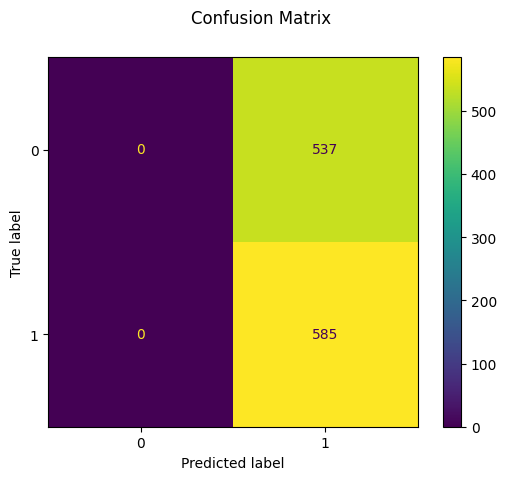

Average accuracy score for run 2: 0.4358288770053476

Run 3: C=10, gamma=0.01, kernel = rbf
n_splits=10, Accuracy=0.4215686274509804
[[209 328]
 [321 264]]
Confusion matrix:
[[209 328]
 [321 264]]


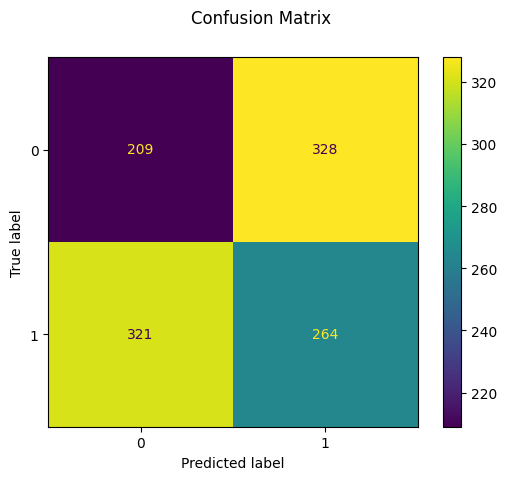

n_splits=20, Accuracy=0.4625668449197861
[[245 292]
 [311 274]]
Confusion matrix:
[[245 292]
 [311 274]]


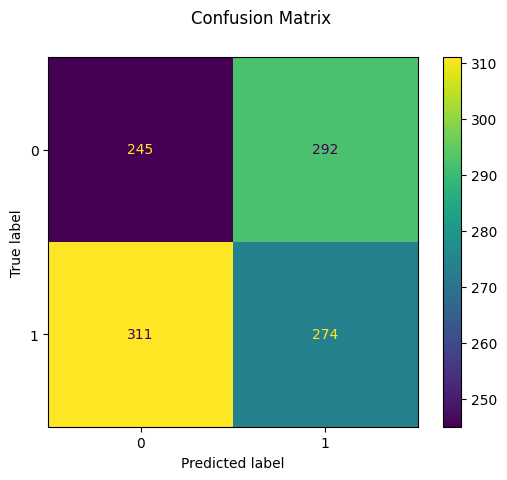

n_splits=30, Accuracy=0.46702317290552586
[[259 278]
 [320 265]]
Confusion matrix:
[[259 278]
 [320 265]]


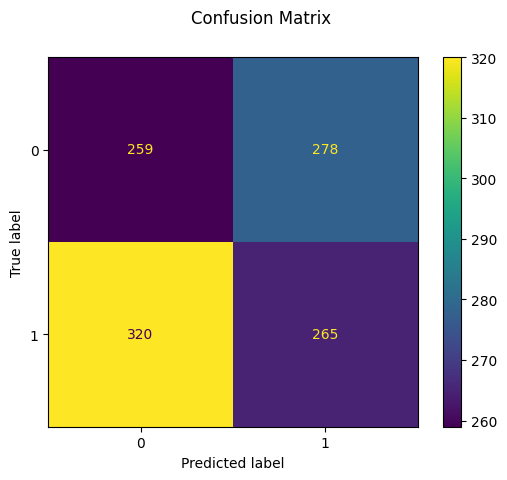

n_splits=40, Accuracy=0.5151515151515151
[[290 247]
 [297 288]]
Confusion matrix:
[[290 247]
 [297 288]]


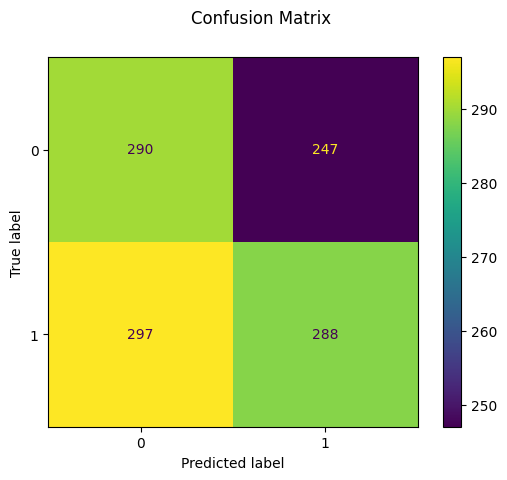

n_splits=50, Accuracy=0.5258467023172906
[[299 238]
 [294 291]]
Confusion matrix:
[[299 238]
 [294 291]]


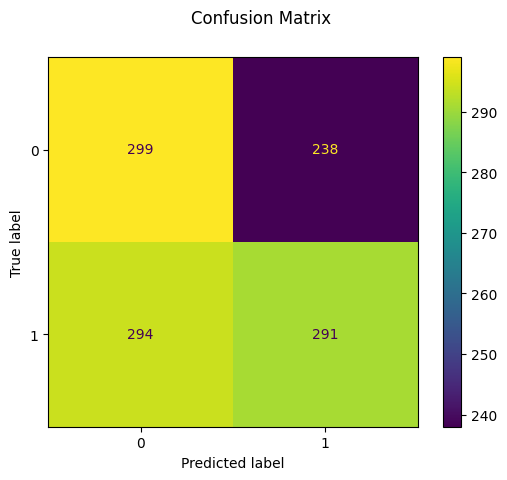

Average accuracy score for run 3: 0.4784313725490196

Run 4: C=0.1, gamma=10, kernel = rbf
n_splits=10, Accuracy=0.3413547237076649
[[ 11 526]
 [213 372]]
Confusion matrix:
[[ 11 526]
 [213 372]]


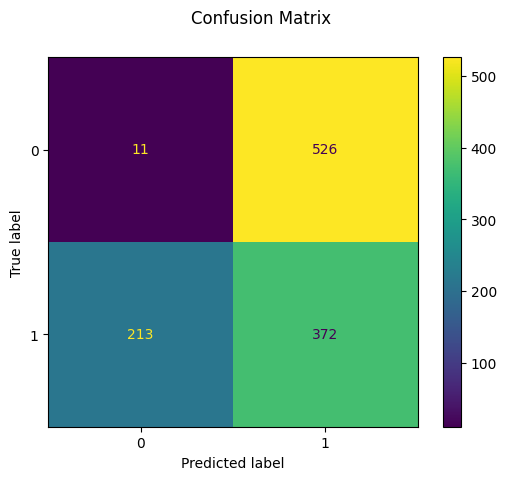

n_splits=20, Accuracy=0.2736185383244207
[[  1 536]
 [279 306]]
Confusion matrix:
[[  1 536]
 [279 306]]


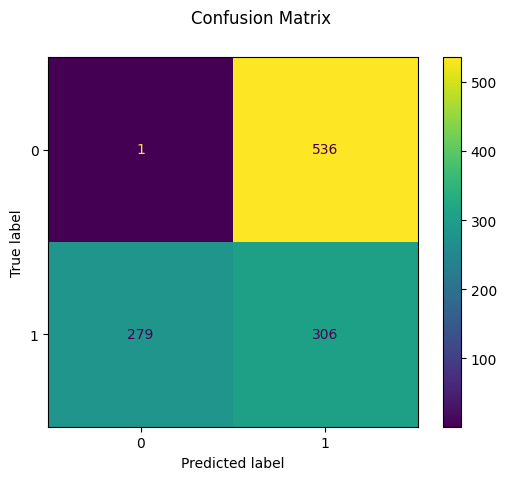

n_splits=30, Accuracy=0.5213903743315508
[[  0 537]
 [  0 585]]
Confusion matrix:
[[  0 537]
 [  0 585]]


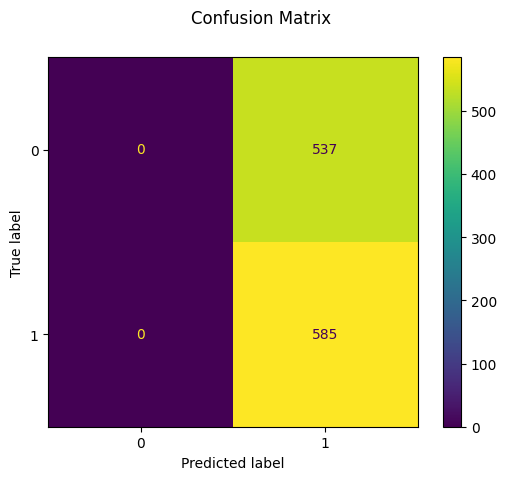

n_splits=40, Accuracy=0.5213903743315508
[[  0 537]
 [  0 585]]
Confusion matrix:
[[  0 537]
 [  0 585]]


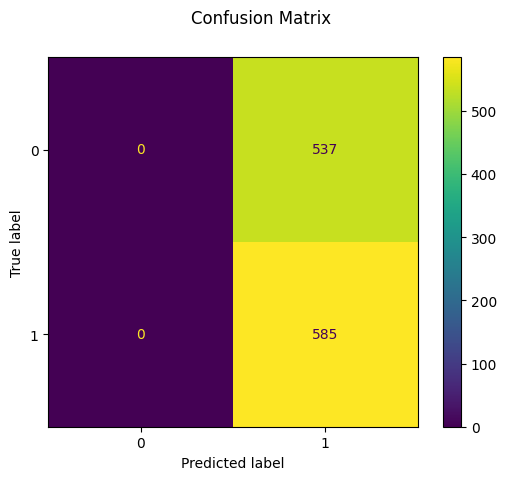

n_splits=50, Accuracy=0.5213903743315508
[[  0 537]
 [  0 585]]
Confusion matrix:
[[  0 537]
 [  0 585]]


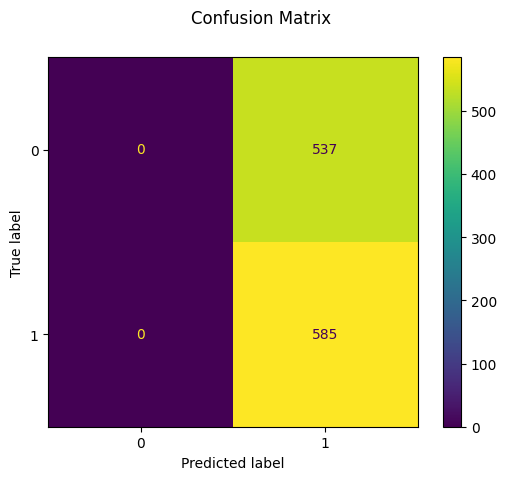

Average accuracy score for run 4: 0.4358288770053476

Run 5: C=1, gamma=0.01, kernel = rbf
n_splits=10, Accuracy=0.3074866310160428
[[ 73 464]
 [313 272]]
Confusion matrix:
[[ 73 464]
 [313 272]]


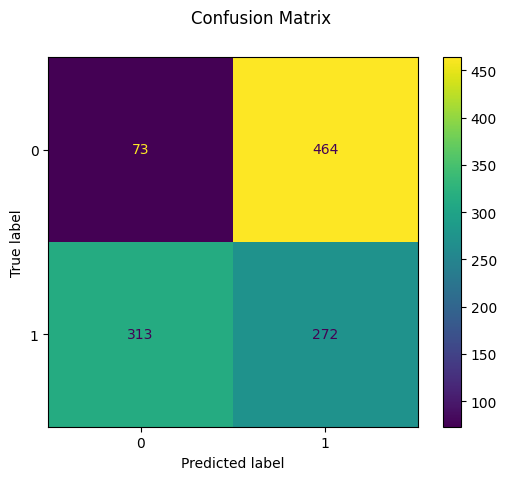

n_splits=20, Accuracy=0.2727272727272727
[[ 46 491]
 [325 260]]
Confusion matrix:
[[ 46 491]
 [325 260]]


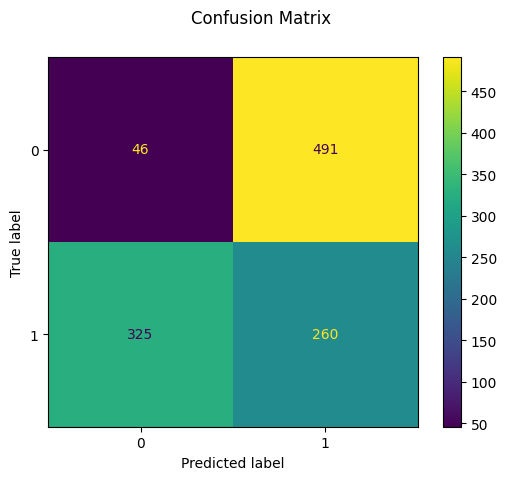

n_splits=30, Accuracy=0.2709447415329768
[[ 27 510]
 [308 277]]
Confusion matrix:
[[ 27 510]
 [308 277]]


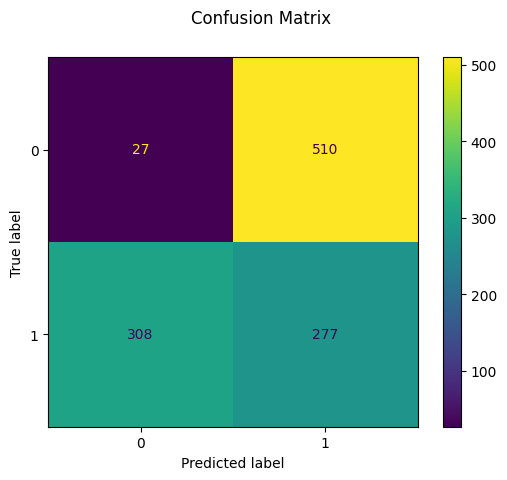

n_splits=40, Accuracy=0.31283422459893045
[[ 20 517]
 [254 331]]
Confusion matrix:
[[ 20 517]
 [254 331]]


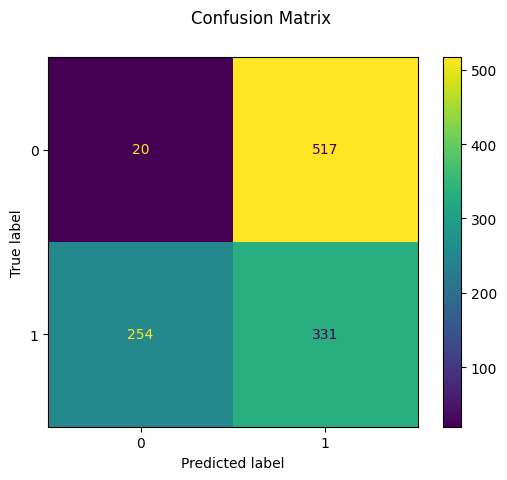

n_splits=50, Accuracy=0.34759358288770054
[[ 30 507]
 [225 360]]
Confusion matrix:
[[ 30 507]
 [225 360]]


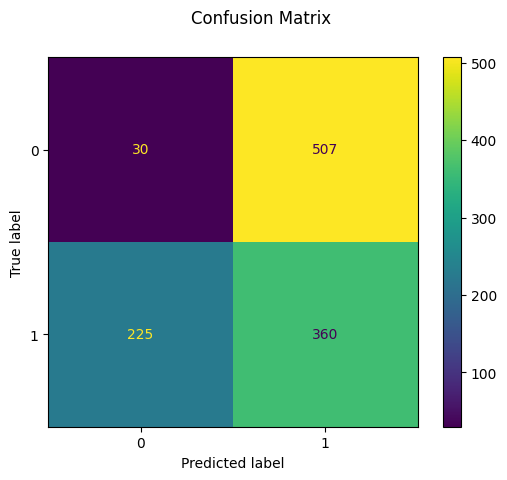

Average accuracy score for run 5: 0.30231729055258466

Overall average accuracy score: 0.4176470588235294


In [17]:
X = data.iloc[:, 0:9]
y = data['Potability']
#Scale the data with mean and standard deviation and then transform all data
X = preprocessing.StandardScaler().fit_transform(X) 

# Define the C and gamma parameters to test
C_vals = [0.1, 1, 10, 100]
gamma_vals = [0.01, 0.1, 1, 10]
kernel_vals= ['rbf', 'linear']

# Define the number of cross-validation splits to use
n_splits_vals = [10,20,30,40,50]

# Define the number of runs to perform
num_runs = 5

# Initialize an array to store the accuracy scores
accuracy_scores = []

# Perform 5 runs with different parameter combinations
for i in range(num_runs):
    # Initialize an array to store the accuracy scores for this run
    run_accuracy_scores = []
    
    # Randomly select a combination of C and gamma values
    C = random.choice(C_vals)
    gamma = random.choice(gamma_vals)
    kernel= random.choice(kernel_vals)
    
    # Print the C and gamma values for this run
    print(f"Run {i+1}: C={C}, gamma={gamma}, kernel = {kernel}")
    
    # Iterate over the range of n_splits values
    for n_splits in n_splits_vals:
        # Define the KFold cross-validation object
        kfold = KFold(n_splits=n_splits, shuffle=False)

        # Initialize the SVM classifier
        svm = SVC(C=C, gamma=gamma, kernel=kernel)

        # Perform cross-validation to obtain predicted class labels
        y_pred = cross_val_predict(svm, X, y, cv=kfold)

        # Calculate the confusion matrix and accuracy score
        cm = confusion_matrix(data.Potability, y_pred)
        acc = accuracy_score(data.Potability, y_pred)

        # Print the confusion matrix and accuracy score for this n_splits value
        print(f"n_splits={n_splits}, Accuracy={acc}")
        print(cm)
        
        disp = metrics.ConfusionMatrixDisplay.from_predictions(data.Potability, y_pred)
        disp.figure_.suptitle("Confusion Matrix")
        print(f"Confusion matrix:\n{disp.confusion_matrix}")
        plt.show()
        
        

        # Add the accuracy score to the run_accuracy_scores array
        run_accuracy_scores.append(acc)

    # Calculate the average accuracy score for this run
    run_avg_accuracy = sum(run_accuracy_scores) / len(run_accuracy_scores)

    # Print the average accuracy score for this run
    print(f"Average accuracy score for run {i+1}: {run_avg_accuracy}")
    print()

    # Add the average accuracy score to the accuracy_scores array
    accuracy_scores.append(run_avg_accuracy)

# Calculate the overall average accuracy score
overall_avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print the overall average accuracy score
print(f"Overall average accuracy score: {overall_avg_accuracy}")


In [18]:
# Calculate the overall average accuracy score
overall_avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Print the overall average accuracy score
print(f"Overall average accuracy score: {overall_avg_accuracy}")

Overall average accuracy score: 0.4176470588235294


# d) Perform 5 runs employing SVM with the gridsearch
Display best hyperparameter results obtained for each run.
Display the confusion matrix of the test data for each run.
Calculate the obtained average Accuracy of the test data after 5 runs.

# Grid search

In [19]:
X = data.iloc[:, 0:9]
y = data['Potability']
#Scale the data with mean and standard deviation and then transform all data
X = preprocessing.StandardScaler().fit_transform(X) 

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, data.Potability, test_size=0.2, shuffle=True)

In [20]:
scores = ["precision", "recall"]

In [21]:
import pandas as pd


def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.53, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.53

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

Once we defined our strategy to select the best model, we define the values of the hyper-parameters and create the grid-search instance:

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


'''A smaller value of C will give a wider margin separating the classes, 
which can lead to a simpler model with less overfitting. 
A larger value of C will give a narrower margin, which can lead to a more 
complex model with less bias. Possible values to try for C are usually in 
the range of 0.1 to 1000.'''

'''Gamma parameter: This parameter controls the shape of the decision boundary. 
A smaller value of gamma will lead to a smoother decision boundary, 
while a larger value of gamma will lead to a more complex and wiggly boundary 
that is more likely to overfit the training data. 
Possible values to try for gamma are usually in the range of 0.0001 to 10.'''
tuned_parameters = [
    {"gamma": [1e-3, 1e-4, 1e-5, 1e-6, 1e-7], "C": [1, 10, 100, 1000]},
]

grid_search = GridSearchCV(
    SVC(), tuned_parameters, scoring=scores, refit=refit_strategy
)
grid_search.fit(X_train, y_train)

All grid-search results:
precision: 0.546 (±0.009), recall: 0.972 (±0.017), for {'C': 1, 'gamma': 0.001}
precision: 0.577 (±0.032), recall: 0.691 (±0.023), for {'C': 1, 'gamma': 0.0001}
precision: 0.535 (±0.038), recall: 0.635 (±0.040), for {'C': 1, 'gamma': 1e-05}
precision: 0.539 (±0.017), recall: 0.663 (±0.056), for {'C': 1, 'gamma': 1e-06}
precision: 0.517 (±0.021), recall: 0.678 (±0.088), for {'C': 1, 'gamma': 1e-07}
precision: 0.548 (±0.011), recall: 0.951 (±0.027), for {'C': 10, 'gamma': 0.001}
precision: 0.561 (±0.020), recall: 0.620 (±0.027), for {'C': 10, 'gamma': 0.0001}
precision: 0.532 (±0.036), recall: 0.544 (±0.052), for {'C': 10, 'gamma': 1e-05}
precision: 0.533 (±0.028), recall: 0.620 (±0.042), for {'C': 10, 'gamma': 1e-06}
precision: 0.529 (±0.041), recall: 0.635 (±0.056), for {'C': 10, 'gamma': 1e-07}
precision: 0.548 (±0.011), recall: 0.951 (±0.027), for {'C': 100, 'gamma': 0.001}
precision: 0.561 (±0.021), recall: 0.618 (±0.030), for {'C': 100, 'gamma': 0.0001}
pre

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05, 1e-06, 1e-07]}],
             refit=<function refit_strategy at 0x7fecf93680d0>,
             scoring=['precision', 'recall'])

In [23]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.001}

In [24]:
#grid search with best params
params = {'C': [1], 'gamma': [0.001]}
grid = GridSearchCV(SVC(), params, refit = True, verbose = 2)

# modeling takes place 
clf = grid.fit(X_train, y_train)

###################
# testing the model
###################
grid_pred_ = grid.predict(X_test)

# print classification report on test data
print ('\n classification report')
print(classification_report(y_test, grid_pred_))

print('confussion matrix with optimal gridseach parameter')
print(confusion_matrix(y_test,grid_pred_))


print('Accuracy test data:', accuracy_score(y_test, grid.predict(X_test)))
print('Precision test:', precision_score(y_test, grid.predict(X_test)))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...................................C=1, gamma=0.001; total time=   0.1s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s

 classification report
              precision    recall  f1-score   support

           0       0.36      0.05      0.08       109
           1       0.51      0.92      0.65       116

    accuracy                           0.50       225
   macro avg       0.43      0.48      0.37       225
weighted avg       0.43      0.50      0.38       225

confussion matrix with optimal gridseach parameter
[[  5 104]
 [  9 107]]
Accuracy test data: 0.49777777777777776
Precision test: 0.5071090047393365


In [16]:
from sklearn.metrics import classification_report

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.12      0.21       105
           1       0.55      0.93      0.69       120

    accuracy                           0.56       225
   macro avg       0.58      0.53      0.45       225
weighted avg       0.58      0.56      0.47       225



# e) Improve the accuracy by sampling/deleting samples of one attribute e.g., “conductivity” of the source file such that a clear distinction of the histogram for Y=0 and Y=1 is visible, see example below.

In [25]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
1,7.657991,236.960889,14245.78912,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1
2,8.322987,207.252462,28049.64628,8.827061,297.813085,358.725869,18.709273,60.911420,4.052136,1
3,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
4,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0


In [26]:
#choosing column Conductivity look at the values for class o
data.Conductivity[data.Potability==0].describe()

count    537.000000
mean     425.812324
std       78.808028
min      210.319182
25%      368.402857
50%      422.039495
75%      482.673327
max      666.690618
Name: Conductivity, dtype: float64

In [27]:
#looking for the values of Conductivity for class 1
data.Conductivity[data.Potability==1].describe()

count    585.000000
mean     424.990339
std       80.469505
min      254.392306
25%      359.569081
50%      423.455906
75%      479.995905
max      657.570422
Name: Conductivity, dtype: float64

For example, keep the rows with the highest 45% and lowest 45% of Conductivity values for Y=0 and Y=1, respectively.

In [28]:
df_filtered = data.drop(data[(data["Conductivity"] > 430) & (data["Potability"] == 0)].index)

In [29]:
data_filtered = df_filtered.drop(df_filtered[(df_filtered["Conductivity"] < 420) & (df_filtered["Potability"] == 1)].index)

In [30]:
data_filtered

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
3,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
4,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
5,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
8,6.514415,198.767351,21218.70287,8.670937,323.596349,413.290450,14.900000,79.847843,5.200885,0
...,...,...,...,...,...,...,...,...,...,...
1113,8.378108,198.511213,28474.20258,6.477057,319.477187,499.866994,15.389083,35.221200,4.524693,1
1114,6.923636,260.593154,24792.52562,5.501164,332.232177,607.773567,15.483027,51.535867,4.013339,1
1116,8.197353,203.105091,27701.79405,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
1119,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


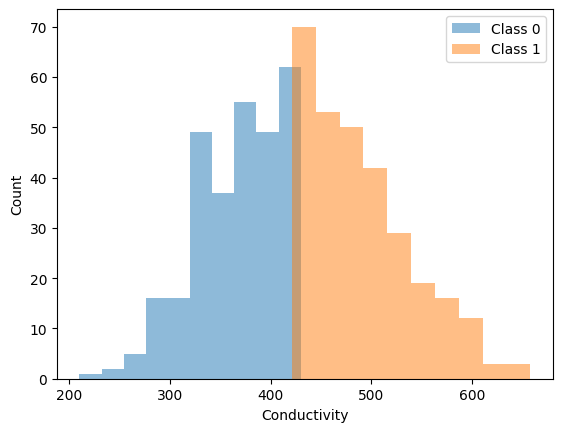

In [35]:
import matplotlib.pyplot as plt

# assume `df` is your dataframe and `feature` is the column you want to plot
# `class_column` is the column containing the class labels (0 or 1)
feature = 'Conductivity'
class_column = 'Potability'

# filter the dataframe to get only the rows with class 0
class0 = data_filtered[data_filtered[class_column] == 0]
# filter the dataframe to get only the rows with class 1
class1 = data_filtered[data_filtered[class_column] == 1]

# plot histograms of the feature for each class
plt.hist(class0[feature], alpha=0.5, label='Class 0')
plt.hist(class1[feature], alpha=0.5, label='Class 1')
plt.xlabel(feature)
plt.ylabel('Count')
plt.legend()
plt.show()



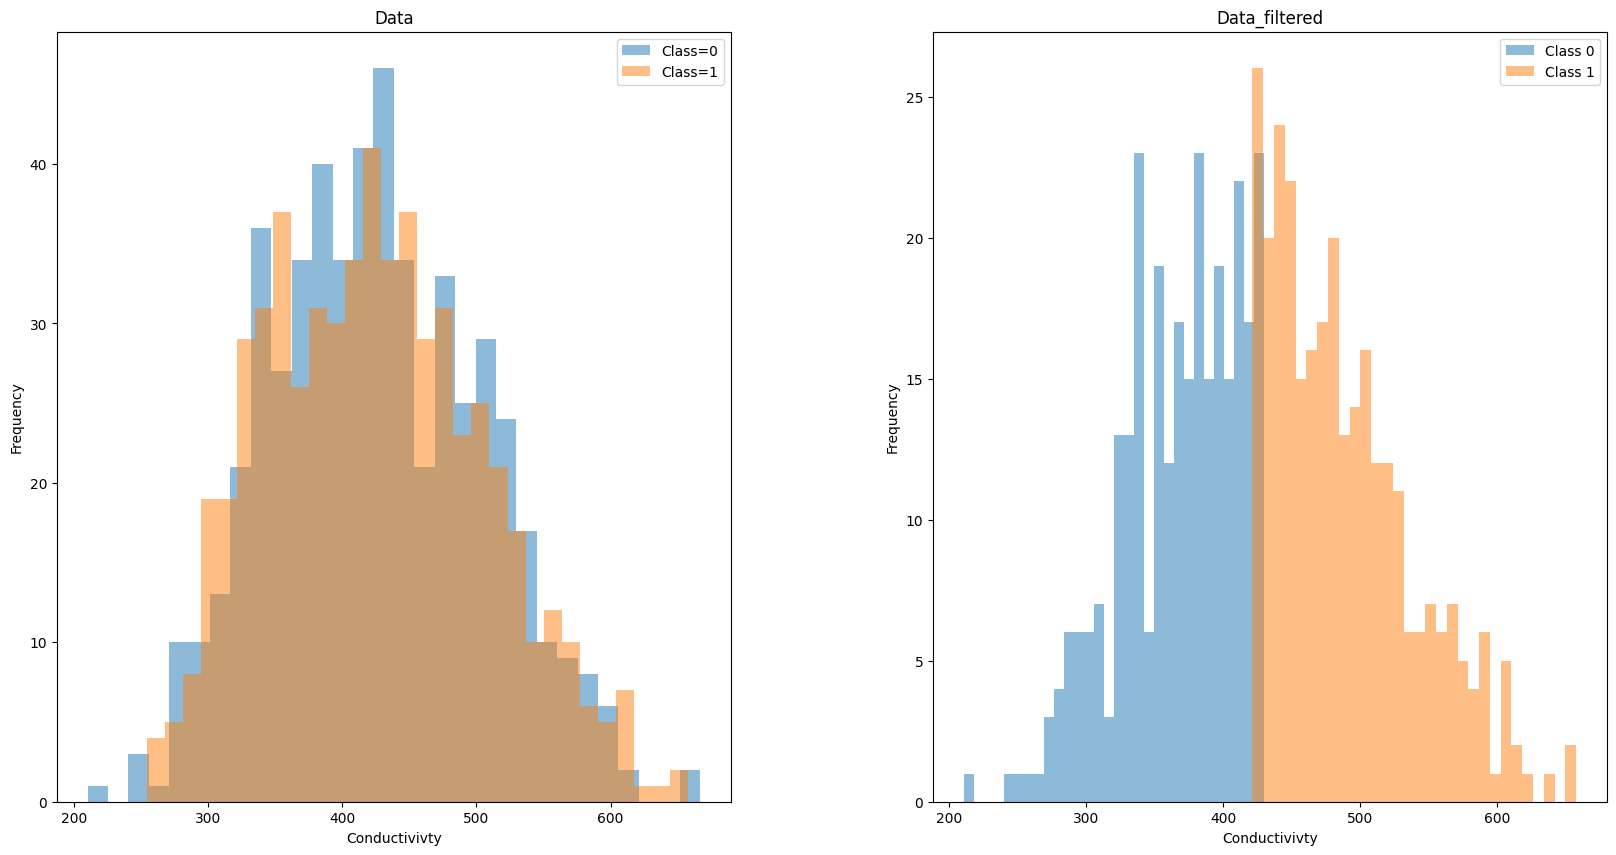

In [36]:
# Split the data based on the value of Y (Potability)
data_Y0 = data[data['Potability'] == 0]
data_Y1 = data[data['Potability'] == 1]

# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten the array of subplots for easier indexing
axs = axs.flatten()

axs[1].hist(class0[feature], bins=30, alpha=0.5, label='Class 0')
axs[1].hist(class1[feature], bins=30, alpha=0.5, label='Class 1')

axs[0].hist(data_Y0[feature], bins=30, alpha=0.5, label='Class=0')
axs[0].hist(data_Y1[feature], bins=30, alpha=0.5, label='Class=1')

axs[0].set_title('Data')
axs[1].set_title('Data_filtered')
axs[0].set_xlabel('Conductivivty')
axs[0].set_ylabel('Frequency')
axs[0].legend()
axs[1].set_xlabel('Conductivivty')
axs[1].set_ylabel('Frequency')
axs[1].legend()


# Show the plot
plt.show()

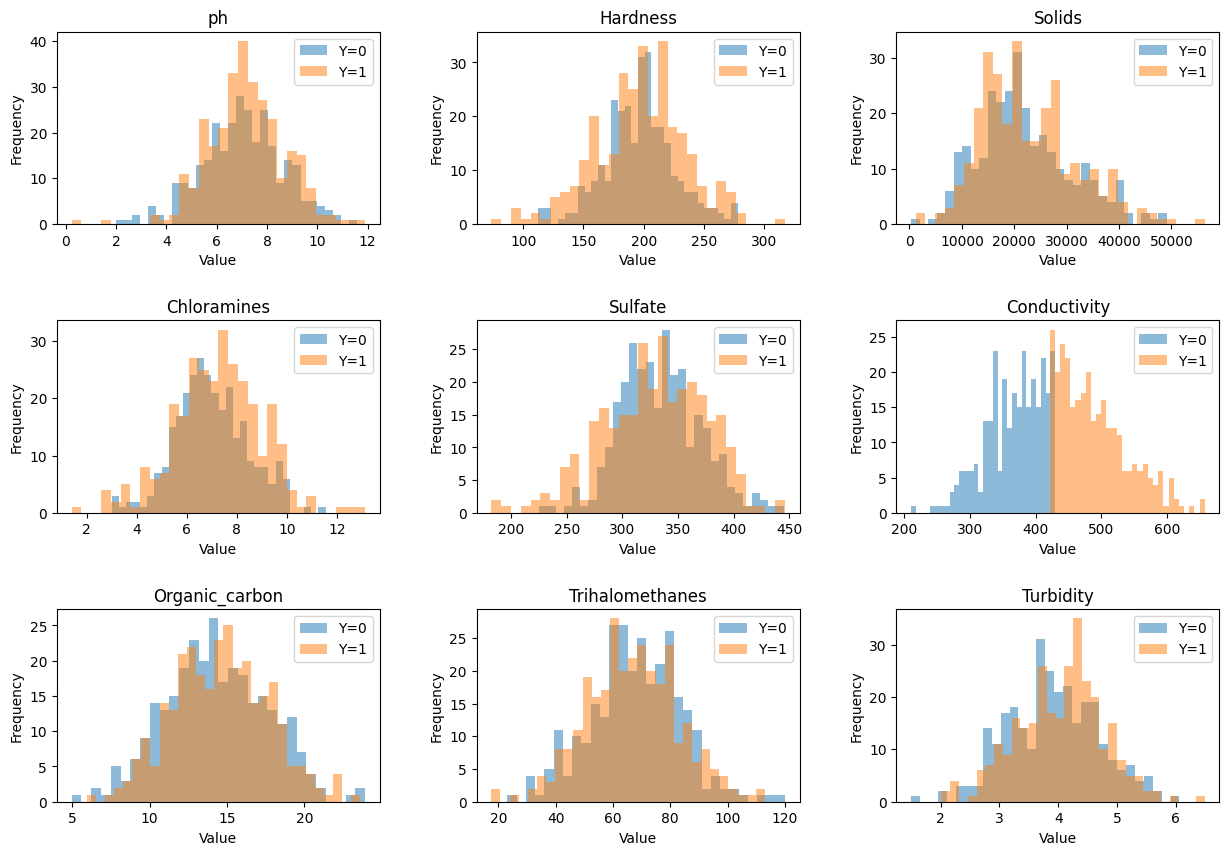

In [38]:
# Split the data based on the value of Y (Potability)
data_Y0 = data_filtered[data_filtered['Potability'] == 0]
data_Y1 = data_filtered[data_filtered['Potability'] == 1]

# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Flatten the array of subplots for easier indexing
axs = axs.flatten()

# Loop through each attribute and plot a histogram for Y=0 and Y=1
for i, column in enumerate(data.columns[:-1]):
    axs[i].hist(data_Y0[column], bins=30, alpha=0.5, label='Y=0')
    axs[i].hist(data_Y1[column], bins=30, alpha=0.5, label='Y=1')
    axs[i].set_title(column)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()

# Show the plot
plt.show()

# f) Display histogram and of each attribute and Perform 5 runs with the modified data source employing SVM with the gridsearch.
Display best hyperparameter results obtained for each run.
Display the confusion matrix of the test data for each run.
Calculate the obtained average Accuracy of the test data after 5 runs. Comment your results.

In [33]:
X = data_filtered.iloc[:, 0:9]
y = data_filtered['Potability']
#Scale the data with mean and standard deviation and then transform all data
X = preprocessing.StandardScaler().fit_transform(X) 
# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data_filtered, data_filtered.Potability, test_size=0.2, shuffle=True)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=10, kernel=linear; total time= 1.0min
[CV] END .....................C=0.1, gamma=10, kernel=linear; total time=   3.4s
[CV] END .....................C=0.1, gamma=10, kernel=linear; total time=   6.9s
[CV] END .....................C=0.1, gamma=10, kernel=linear; total time=  16.5s
[CV] END .....................C=0.1, gamma=10, kernel=linear; total time=  59.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=

[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=  16.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   7.7s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time= 1.4min
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=  23.8s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=  29.6s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=  16.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   7.7s
[CV] END ...................

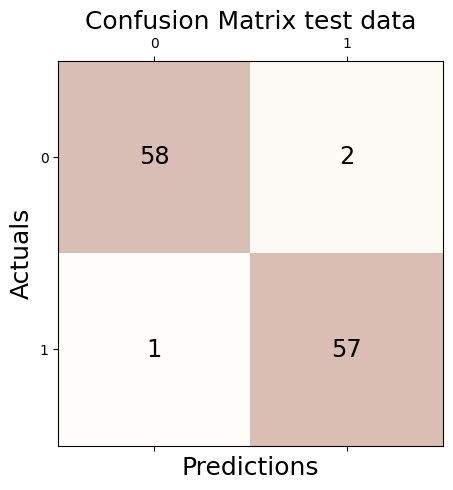

In [34]:
# defining parameters range and kernel types to be used
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [10, 1, 0.1, 0.01],'kernel': ['rbf', 'linear' ]} 

# select model, create an instance of gridesearch, use contructor 
# for parameter setting
# default 5 fold cross validation
# provide hyperparamter set ranges (C, gamma and kernel type)
# verbose = 2 the score is also displayed
# Refit an estimator using the best found parameters on the whole dataset
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)

# modeling takes place 
clf = grid.fit(X_train, y_train)

# print(' obtained best parameter after hyper parameter tuning\n')
print('\n')
print('hyper parameter result')
print(grid.best_params_)


###################
# testing the model
###################
grid_pred = grid.predict(X_test)

# print classification report on test data
print ('\n classification report')
print(classification_report(y_test, grid_pred))

print('confussion matrix with optimal gridseach parameter')
print(confusion_matrix(y_test,grid_pred))


print('Accuracy test data:', accuracy_score(y_test, grid.predict(X_test)))
print('Precision test:', precision_score(y_test, grid.predict(X_test)))
conf_matrix = confusion_matrix(y_test,grid_pred)


############################################
# Plot the confusion matrix using Matplotlib
###########################################
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix test data', fontsize=18)
plt.show()

Conclusion
1. Based on histogram we can define which features are important for classification.If features do not overlap they can be good for classification.
2. Accuracy was around 43.58 in the first run.
3. With grid search best params were params  {'C': 1, 'gamma': 1e-05} and 'rbf' kernel
4. After performing deleting some samples, based on 'Conductivity' feature, so reducing overlaping between 2 classes - Accuracy improved  test data: 0.9322033898305084 